<a href="https://colab.research.google.com/github/MagdaliniLytra/Machine-Learning-AI-Master/blob/main/ML_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2

# Task 1: Load the dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Task 2 : Random display of samples (one plot for each digit)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

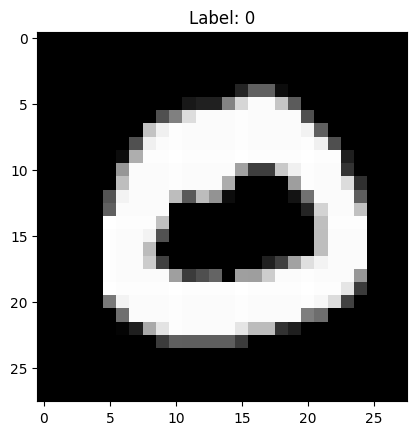

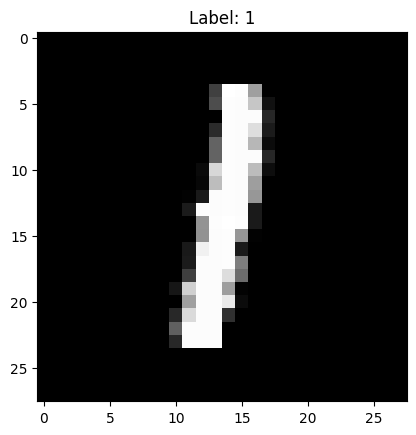

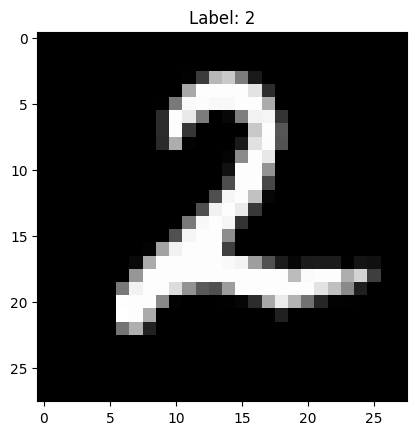

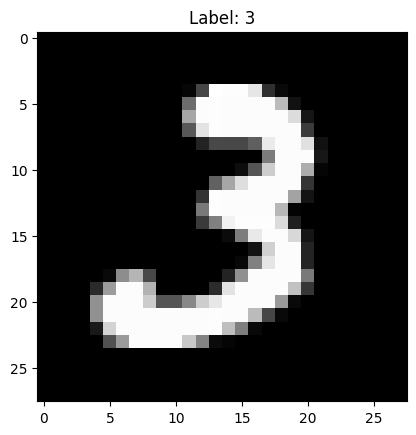

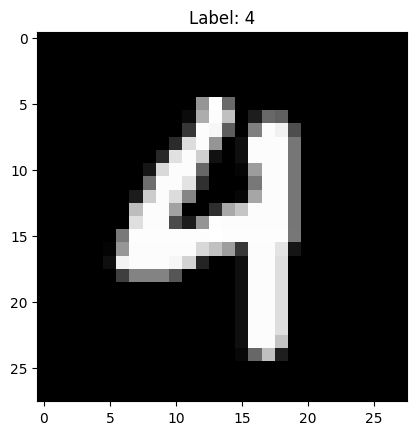

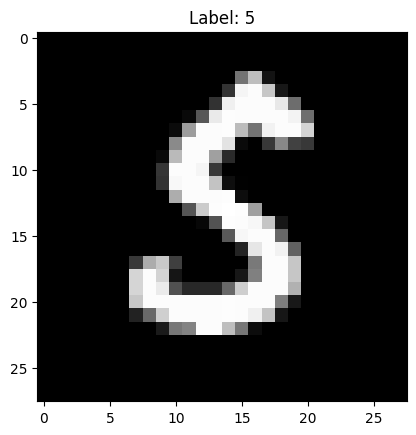

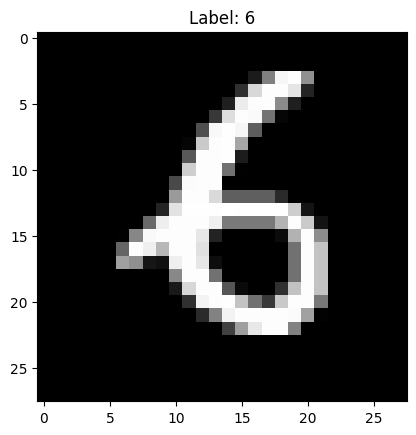

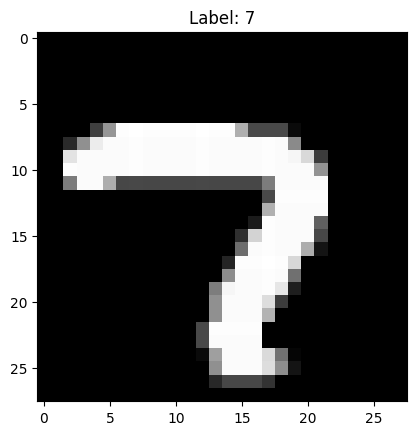

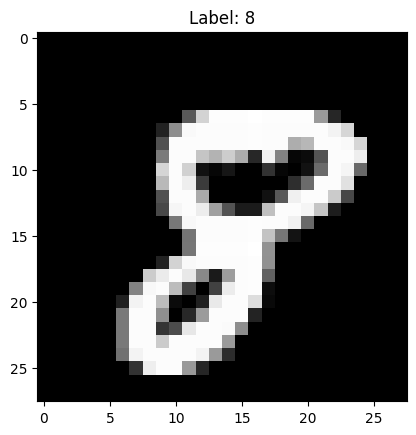

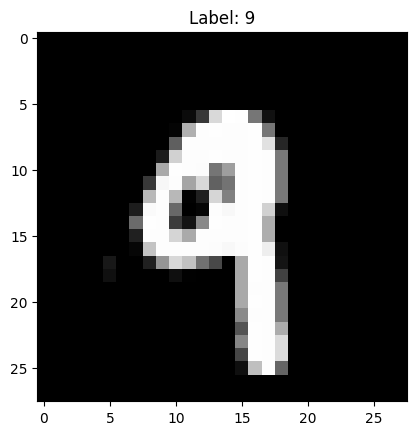

In [ ]:
for digit in range(10):
    indices = np.where(y_train == digit)[0] # y_train has the labels
    random_index = np.random.choice(indices) # random sample
    image = x_train[random_index]

    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {digit}")
plt.show()

# Task 3: Image size and pixel importance

As we can see above from the `shape` of `x_train` and `x_test` the size of each image is 28x28, so each image contains 784 pixel values. Each pixel value (0-255) represents the grayscale intensity of the corresponding pixel in the image. Not all pixels of the image are important cause only a few of them  contain the digit, most of them are black.

# Task 4: Convert to vector

In [ ]:
# convert to vector, each image is converted into a 1D array of 784 values
x_train_vector= x_train.reshape(x_train.shape[0], -1)
x_test_vector = x_test.reshape(x_test.shape[0], -1)
x_train_vector.shape, x_test_vector.shape

(60000, 784) (10000, 784)


# Task 5: KNN Accuracy vs k

Training KNN with k = 5
Training KNN with k = 15
Training KNN with k = 51
Training KNN with k = 244


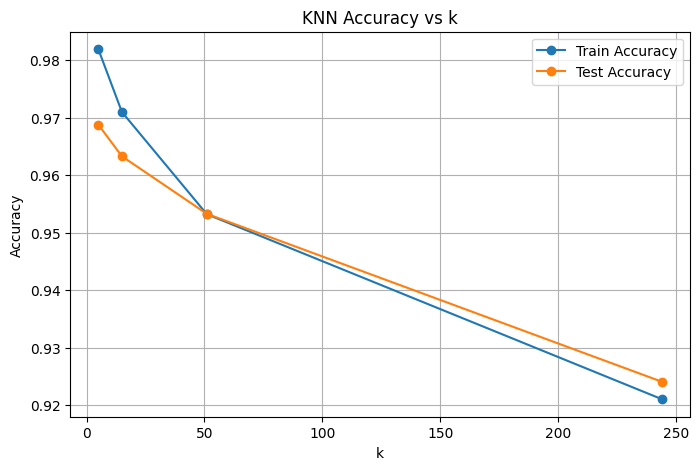

In [ ]:
N = len(x_train)
k_values = [5, 15, 51, int(np.sqrt(N))]

train_accuracy = []
test_accuracy = []

for k in k_values:
    print(f"Training KNN with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_vector, y_train)
    y_train_pred = knn.predict(x_train_vector)
    y_test_pred = knn.predict(x_test_vector)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracy, marker='o', label="Train Accuracy")
plt.plot(k_values, test_accuracy, marker='o', label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
train_accuracy, test_accuracy

([0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667],
 [0.9688, 0.9633, 0.9533, 0.9241])

The plot shows that a smaller k like 5 and 15 leads to overfitting, cause the train  accuracy is higher than the test accuracy. A larger k like 51 and the square root of N, leads to better results and smooths out outliers, as it has a lower train accuracy and  higher test accuracy. The best accuracy is achieved with the square root of N as k, which is frequently used as k.

# Task 6: Scaling and retraining

In [ ]:
X_train = x_train_vector/255
X_test = x_test_vector/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Training KNN with k = 5
Training KNN with k = 15
Training KNN with k = 51
Training KNN with k = 244


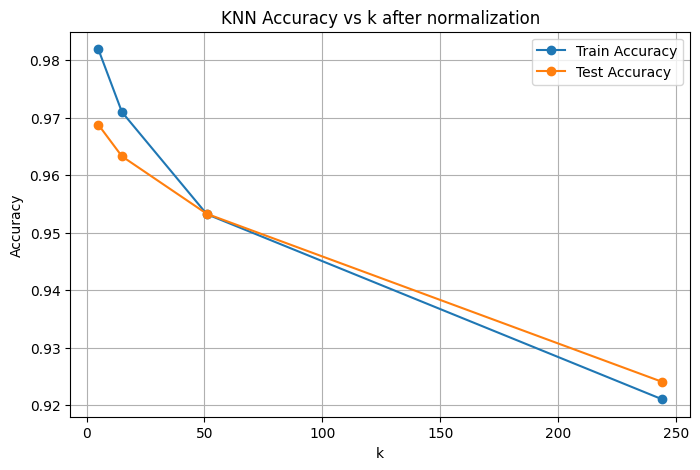

In [ ]:
train_accuracy = []
test_accuracy = []

for k in k_values:
    print(f"Training KNN with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracy, marker='o', label="Train Accuracy")
plt.plot(k_values, test_accuracy, marker='o', label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k after normalization")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
train_accuracy, test_accuracy

([0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667],
 [0.9688, 0.9633, 0.9533, 0.9241])

As we can see above the accuracy of KNN remains the same after scaling the data by dividing all pixel values by 255 because KNN relies entirely on calculating the Euclidean distance between points. The scaling reduces all distances by the same factor, but it preserves the relative order of those distances. If a sample was the closest neighbor to the test sample before scaling, it will still be the closest neighbor after scaling. So the final prediction for any test samples remains identical, resulting in the same train and test accuracy.

# Task 7: Predict handwritten image

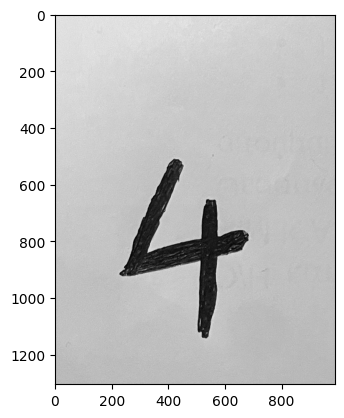

In [ ]:
# load sample image
file = '/content/IMG_4736.jpeg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
# sample image
plt.imshow(test_image, cmap='gray')

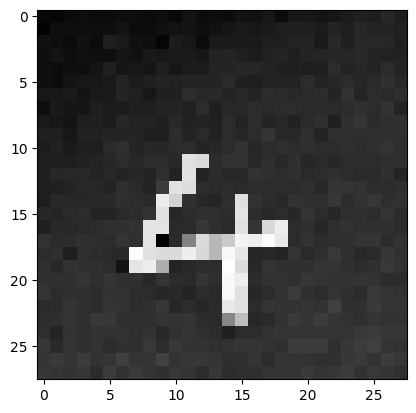

In [ ]:
# resize the image to 28x28
img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
# invert colors (MNIST is white digit on black background)
img_resized = cv2.bitwise_not(img_resized)
# reformatted image
plt.imshow(img_resized, cmap='gray')

In [ ]:
img_vector = img_resized.reshape(1, -1)
N = len(x_train_vector)
k = int(np.sqrt(N))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_vector, y_train)
prediction = knn.predict(img_vector)
print("Predicted digit:", prediction[0])

Predicted digit: 4


Using the best performing classifier, corresponding to the square root of N, the model successfully predicted the digit in the handwritten image after it was preprocessed and converted into the MNIST compatible format.